In [3]:
import zipfile

with zipfile.ZipFile("/test.csv.zip", "r") as zip_ref:
    zip_ref.extractall("/content")


In [4]:
import os
os.listdir("/content")


['.config', 'test.csv', 'sample_data']

In [5]:
import pandas as pd

df = pd.read_csv("/content/test.csv")
df.head()


,Unnamed: 0,id,Gender,Customer Type,Age,Type of Travel,Class,Flight Distance,Inflight wifi service,Departure/Arrival time convenient,...,Inflight entertainment,On-board service,Leg room service,Baggage handling,Checkin service,Inflight service,Cleanliness,Departure Delay in Minutes,Arrival Delay in Minutes,satisfaction
0,0,19556,Female,Loyal Customer,52,Business travel,Eco,160,5,4,...,5,5,5,5,2,5,5,50,44.0,satisfied
1,1,90035,Female,Loyal Customer,36,Business travel,Business,2863,1,1,...,4,4,4,4,3,4,5,0,0.0,satisfied
2,2,12360,Male,disloyal Customer,20,Business travel,Eco,192,2,0,...,2,4,1,3,2,2,2,0,0.0,neutral or dissatisfied
3,3,77959,Male,Loyal Customer,44,Business travel,Business,3377,0,0,...,1,1,1,1,3,1,4,0,6.0,satisfied
4,4,36875,Female,Loyal Customer,49,Business travel,Eco,1182,2,3,...,2,2,2,2,4,2,4,0,20.0,satisfied


In [6]:
df = df.drop(columns=['Unnamed: 0'])


In [7]:
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25976 entries, 0 to 25975
Data columns (total 24 columns):
 #   Column                             Non-Null Count  Dtype  
---  ------                             --------------  -----  
 0   id                                 25976 non-null  int64  
 1   Gender                             25976 non-null  object 
 2   Customer Type                      25976 non-null  object 
 3   Age                                25976 non-null  int64  
 4   Type of Travel                     25976 non-null  object 
 5   Class                              25976 non-null  object 
 6   Flight Distance                    25976 non-null  int64  
 7   Inflight wifi service              25976 non-null  int64  
 8   Departure/Arrival time convenient  25976 non-null  int64  
 9   Ease of Online booking             25976 non-null  int64  
 10  Gate location                      25976 non-null  int64  
 11  Food and drink                     25976 non-null  int

Veri seti, havayolu yolcularına ait memnuniyet düzeyini etkileyen çeşitli kategorik ve sayısal değişkenleri içermektedir. Yapılan ilk analizlerde, veri setinde 25 sütun ve 26.000'den fazla satır bulunduğu görülmüştür. İlk olarak, Unnamed: 0 adlı indeks sütunu veri analizine katkı sağlamadığı için veri setinden çıkarılmıştır.

In [8]:
# Sayısal ve kategorik değişkenleri yazdırma
numerical_cols = df.select_dtypes(include=['int64', 'float64']).columns.tolist()
categorical_cols = df.select_dtypes(include='object').columns.tolist()

print("Sayısal Değişkenler:", numerical_cols)
print("Kategorik Değişkenler:", categorical_cols)


Sayısal Değişkenler: ['id', 'Age', 'Flight Distance', 'Inflight wifi service', 'Departure/Arrival time convenient', 'Ease of Online booking', 'Gate location', 'Food and drink', 'Online boarding', 'Seat comfort', 'Inflight entertainment', 'On-board service', 'Leg room service', 'Baggage handling', 'Checkin service', 'Inflight service', 'Cleanliness', 'Departure Delay in Minutes', 'Arrival Delay in Minutes']
Kategorik Değişkenler: ['Gender', 'Customer Type', 'Type of Travel', 'Class', 'satisfaction']


In [9]:
df[numerical_cols].describe()


,id,Age,Flight Distance,Inflight wifi service,Departure/Arrival time convenient,Ease of Online booking,Gate location,Food and drink,Online boarding,Seat comfort,Inflight entertainment,On-board service,Leg room service,Baggage handling,Checkin service,Inflight service,Cleanliness,Departure Delay in Minutes,Arrival Delay in Minutes
count,25976.000000,25976.000000,25976.000000,25976.000000,25976.000000,25976.000000,25976.000000,25976.000000,25976.000000,25976.000000,25976.000000,25976.000000,25976.000000,25976.000000,25976.000000,25976.000000,25976.000000,25976.00000,25893.000000
mean,65005.657992,39.620958,1193.788459,2.724746,3.046812,2.756775,2.977094,3.215353,3.261665,3.449222,3.357753,3.385664,3.350169,3.633238,3.314175,3.649253,3.286226,14.30609,14.740857
std,37611.526647,15.135685,998.683999,1.335384,1.533371,1.412951,1.282133,1.331506,1.355536,1.320090,1.338299,1.282088,1.318862,1.176525,1.269332,1.180681,1.319330,37.42316,37.517539
min,17.000000,7.000000,31.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,1.000000,0.000000,0.000000,0.00000,0.000000
25%,32170.500000,27.000000,414.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,3.000000,3.000000,3.000000,2.000000,0.00000,0.000000
50%,65319.500000,40.000000,849.000000,3.000000,3.000000,3.000000,3.000000,3.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,3.000000,4.000000,3.000000,0.00000,0.000000
75%,97584.250000,51.000000,1744.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,5.000000,4.000000,4.000000,4.000000,5.000000,4.000000,5.000000,4.000000,12.00000,13.000000
max,129877.000000,85.000000,4983.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,1128.00000,1115.000000


In [10]:
df[numerical_cols].median()


,0
id,65319.5
Age,40.0
Flight Distance,849.0
Inflight wifi service,3.0
Departure/Arrival time convenient,3.0
Ease of Online booking,3.0
Gate location,3.0
Food and drink,3.0
Online boarding,4.0
Seat comfort,4.0


Sayısal değişkenler üzerinde yapılan özet istatistik analizinde; yaş, uçuş mesafesi ve hizmet değerlendirme puanları gibi değişkenler için ortalama, medyan, standart sapma, minimum ve maksimum değerler elde edilmiştir. Örneğin yolcuların yaş ortalaması yaklaşık olarak 40, uçuş mesafesi ortalaması ise 849.0 olarak belirlenmiştir.

In [11]:
for col in categorical_cols:
    print(f"{col} değişkeninin değer sayıları:")
    print(df[col].value_counts())
    print("\n")


Gender değişkeninin değer sayıları:
Gender
Female    13172
Male      12804
Name: count, dtype: int64


Customer Type değişkeninin değer sayıları:
Customer Type
Loyal Customer       21177
disloyal Customer     4799
Name: count, dtype: int64


Type of Travel değişkeninin değer sayıları:
Type of Travel
Business travel    18038
Personal Travel     7938
Name: count, dtype: int64


Class değişkeninin değer sayıları:
Class
Business    12495
Eco         11564
Eco Plus     1917
Name: count, dtype: int64


satisfaction değişkeninin değer sayıları:
satisfaction
neutral or dissatisfied    14573
satisfied                  11403
Name: count, dtype: int64




Kategorik değişkenlerin frekans analizine göre:

Cinsiyet dağılımı dengelidir: Kadın (%51), Erkek (%49).

Yolcuların büyük çoğunluğu sadık müşteri (%81) ve iş amaçlı seyahat eden yolculardan (%69) oluşmaktadır.

Memnuniyet değişkenine bakıldığında, memnun olan yolcu oranı %44, memnun olmayan veya kararsız olanların oranı ise %56'dır.

Uçuş sınıflarına göre dağılımda Business (48%), Eco (45%), Eco Plus (7%) oranında yolcu yer almaktadır.

In [12]:
# Eksik değer sayısı ve oranını belirleme
missing_values = df.isnull().sum()
missing_percent = (missing_values / len(df)) * 100

# Sadece eksik değeri olan sütunları filtreler
missing_data = pd.DataFrame({
    'Eksik Değer Sayısı': missing_values,
    'Yüzde (%)': missing_percent
})

missing_data = missing_data[missing_data["Eksik Değer Sayısı"] > 0]
missing_data.sort_values(by="Yüzde (%)", ascending=False)


,Eksik Değer Sayısı,Yüzde (%)
Arrival Delay in Minutes,83,0.319526


In [14]:
df['Arrival Delay in Minutes'] = df['Arrival Delay in Minutes'].fillna(df['Arrival Delay in Minutes'].median())



Veri seti üzerinde yapılan eksik değer analizinde yalnızca "Arrival Delay in Minutes" sütununda eksik veri bulunduğu gözlemlenmiştir. Bu sütundaki eksik değer sayısı 83 olup, tüm veri setinin yalnızca %0.31’ini oluşturmaktadır. Eksik veri oranının oldukça düşük olması nedeniyle satır silme yerine bu sütundaki eksik değerler medyan ile doldurularak veri kaybı önlenmiş ve analiz süreci sağlıklı şekilde devam ettirilmiştir.

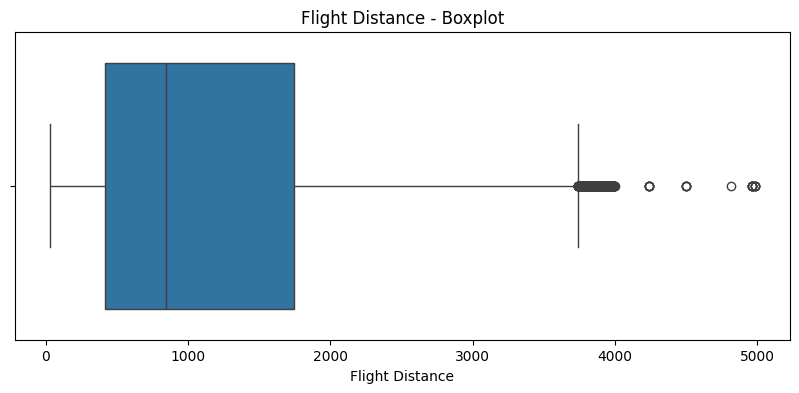

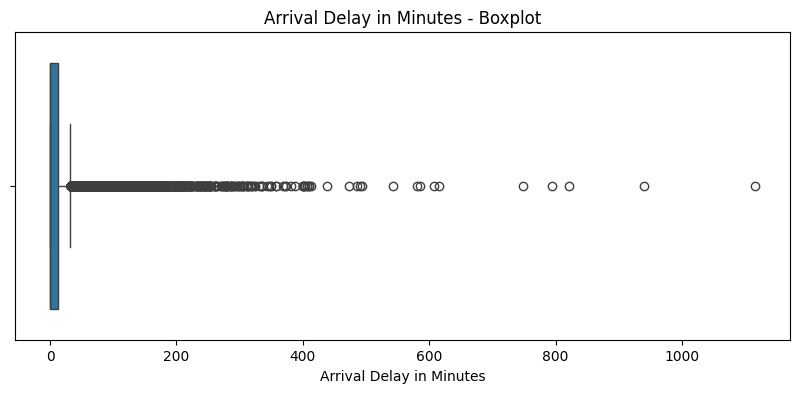

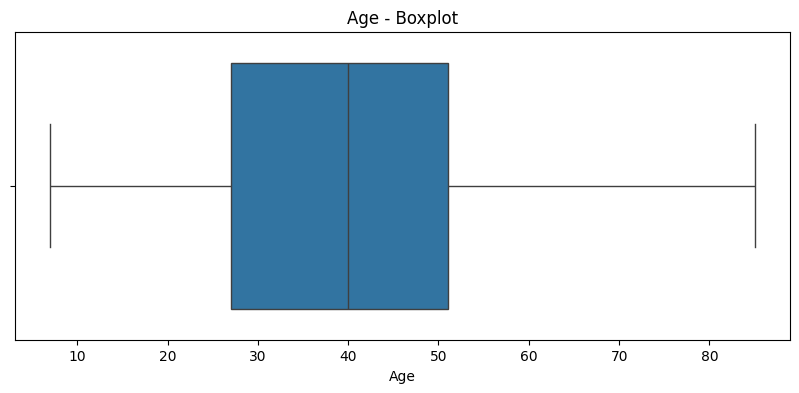

In [15]:
import matplotlib.pyplot as plt
import seaborn as sns

# Uçuş mesafesi
plt.figure(figsize=(10, 4))
sns.boxplot(x=df['Flight Distance'])
plt.title("Flight Distance - Boxplot")
plt.show()

# Arrival Delay
plt.figure(figsize=(10, 4))
sns.boxplot(x=df['Arrival Delay in Minutes'])
plt.title("Arrival Delay in Minutes - Boxplot")
plt.show()

# Age
plt.figure(figsize=(10, 4))
sns.boxplot(x=df['Age'])
plt.title("Age - Boxplot")
plt.show()


**Aykırı Değer (Outlier) Analizi**

**Flight Distance**

4000 km üzeri uçuşlar aykırı değer olarak işaretlenmiş.

Bu noktalar genelde uçak seyahatlerinde gerçek ama nadir olan uzun mesafeli uçuşlar olabilir.

Veri yapısına uygunsa genelde silinmez, korunur ama analizlerde dikkate alınır.

**Arrival Delay in Minutes**

200 dakikayı geçen gecikmeler net şekilde aykırı.

Çok sayıda uç değer var. Bu da uçuş sistemlerinin bazı durumlarda ciddi gecikmeler yaşadığını gösteriyor.

Gerçek hayatta mümkün olduğu için genelde silinmez, ama analizde "winsorize" ya da "log transform" ile yumuşatılabilir.

**Age**

Göze çarpan aykırı değer yok.

Yaşlar oldukça dengeli dağılmış. Analize direkt dahil edilebilir.


In [16]:
Q1 = df['Flight Distance'].quantile(0.25)
Q3 = df['Flight Distance'].quantile(0.75)
IQR = Q3 - Q1

alt_sinir = Q1 - 1.5 * IQR
ust_sinir = Q3 + 1.5 * IQR

outliers = df[(df['Flight Distance'] < alt_sinir) | (df['Flight Distance'] > ust_sinir)]
print("Flight Distance değişkeninde aykırı değer sayısı:", len(outliers))


Flight Distance değişkeninde aykırı değer sayısı: 584


Flight Distance değişkeni üzerinde IQR (Interquartile Range) yöntemi ile yapılan analiz sonucunda, toplamda 584 aykırı değer tespit edilmiştir. Bu değerlerin büyük çoğunluğu 4000 km'nin üzerinde olan uzun mesafeli uçuşlara aittir. Uçak seyahatlerinde bu tarz uzun uçuşlar nadir olmakla birlikte gerçek hayatta karşılaşılması mümkün senaryoları temsil eder. Bu nedenle söz konusu aykırı değerler, veri setinden çıkarılmamış, ancak analizlerde dikkate alınmıştır.

In [17]:
def iqr_outlier_count_all(df, numerical_cols):
    print("🟩 Aykırı Değer Sayıları (IQR Yöntemi)\n")
    for column in numerical_cols:
        Q1 = df[column].quantile(0.25)
        Q3 = df[column].quantile(0.75)
        IQR = Q3 - Q1
        lower = Q1 - 1.5 * IQR
        upper = Q3 + 1.5 * IQR
        outlier_count = df[(df[column] < lower) | (df[column] > upper)].shape[0]
        print(f"{column}: {outlier_count}")


iqr_outlier_count_all(df, numerical_cols)


🟩 Aykırı Değer Sayıları (IQR Yöntemi)

id: 0
Age: 0
Flight Distance: 584
Inflight wifi service: 0
Departure/Arrival time convenient: 0
Ease of Online booking: 0
Gate location: 0
Food and drink: 0
Online boarding: 0
Seat comfort: 0
Inflight entertainment: 0
On-board service: 0
Leg room service: 0
Baggage handling: 0
Checkin service: 3218
Inflight service: 0
Cleanliness: 0
Departure Delay in Minutes: 3569
Arrival Delay in Minutes: 3538


Veri setindeki sayısal değişkenler üzerinde **IQR (Interquartile Range)** yöntemi ile yapılan analiz sonucunda bazı değişkenlerde anlamlı düzeyde aykırı değerlere rastlanmıştır. En dikkat çekenler:

Checkin service değişkeninde 3218,

Departure Delay in Minutes değişkeninde 3569,

Arrival Delay in Minutes değişkeninde 3538,

Flight Distance değişkeninde ise 584 adet aykırı değer bulunmaktadır.

Bu değişkenlerdeki aykırı değerlerin önemli bir kısmı, hizmet puanlamalarında uç değer tercihleri (örneğin: yalnızca “1” ya da “5” puanı verilmesi), uçuş sistemlerinde yaşanan aşırı gecikmeler veya nadiren gerçekleşen uzun mesafeli uçuşlardan kaynaklanmaktadır.

Gerçek hayattaki senaryolarda bu değerler nadir ama mümkündür. Bu nedenle aykırı değerler veri setinden çıkarılmamış, ancak analiz sürecinde dikkate alınmıştır. Gerekli durumlarda veri dönüşümleri (örneğin: log-transform, winsorize) yapılabilir.

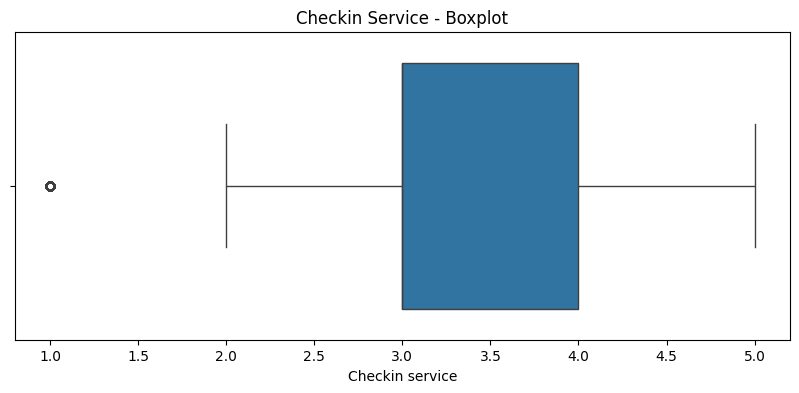

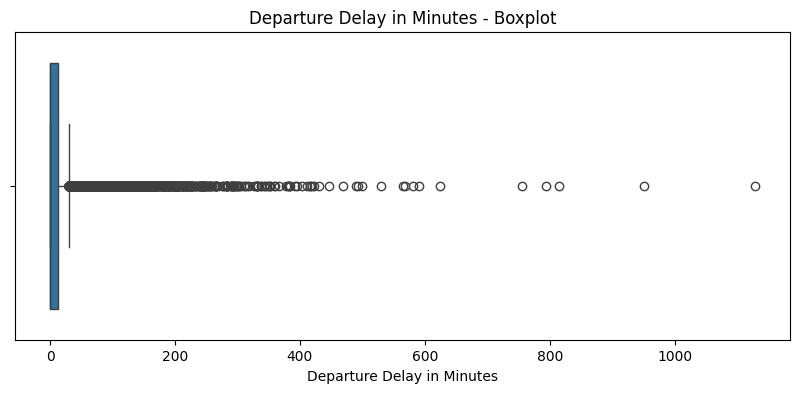

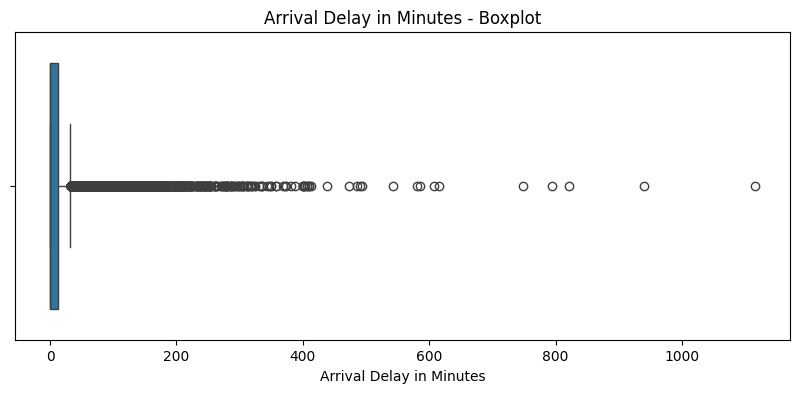

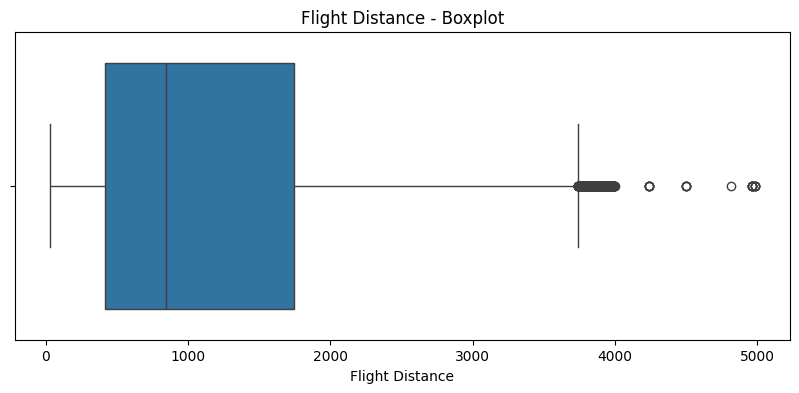

In [18]:
plt.figure(figsize=(10, 4))
sns.boxplot(x=df['Checkin service'])
plt.title("Checkin Service - Boxplot")
plt.show()

plt.figure(figsize=(10, 4))
sns.boxplot(x=df['Departure Delay in Minutes'])
plt.title("Departure Delay in Minutes - Boxplot")
plt.show()

plt.figure(figsize=(10, 4))
sns.boxplot(x=df['Arrival Delay in Minutes'])
plt.title("Arrival Delay in Minutes - Boxplot")
plt.show()

plt.figure(figsize=(10, 4))
sns.boxplot(x=df['Flight Distance'])
plt.title("Flight Distance - Boxplot")
plt.show()


Aykırı değer analizinde IQR yöntemine göre belirlenen en dikkat çekici değişkenler, görselleştirme teknikleriyle de desteklenmiştir. Yukarıdaki boxplot grafiklerinde bu değişkenlerdeki uç değerler açıkça görülmektedir:

**Checkin Service**: Özellikle 1 puanlık değerlendirmeler, düşük frekansla verilen aykırı geri bildirimleri temsil etmektedir. Geri kalan dağılım homojen bir şekilde orta değerlere yayılmıştır.

**Departure Delay in Minutes & Arrival Delay in Minutes**: Her iki değişkende de 200 dakikanın üzerindeki gecikmeler ciddi sayıda aykırı değer içermektedir. Bu, uçuşların zamanında gerçekleşmesinin istisnai durumlar dışında büyük oranda sağlandığını; ancak bazı ekstrem gecikmelerin mevcut olduğunu göstermektedir.

**Flight Distance**: Uçuş mesafesi dağılımında 4000 km üzerindeki uçuşlar aykırı değer olarak tanımlanmıştır. Bu değerler, genellikle uzun mesafeli ve az sayıda gerçekleşen uçuşları temsil eder.

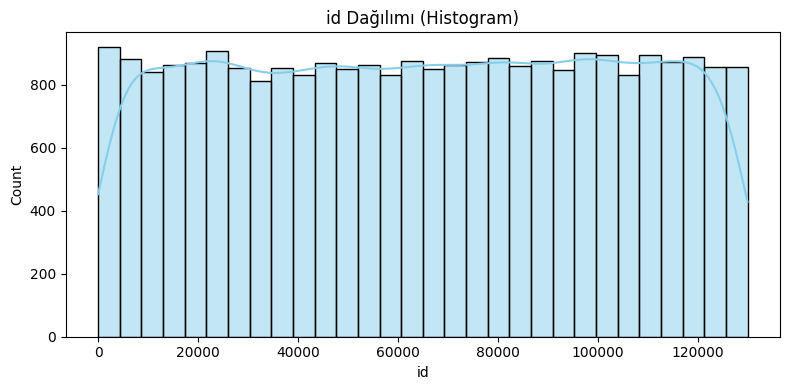

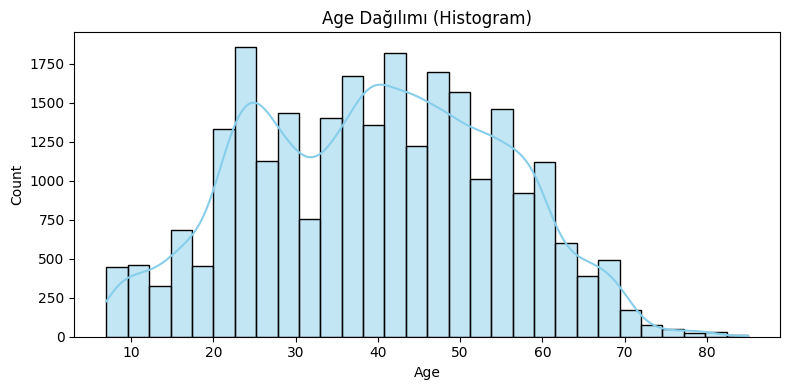

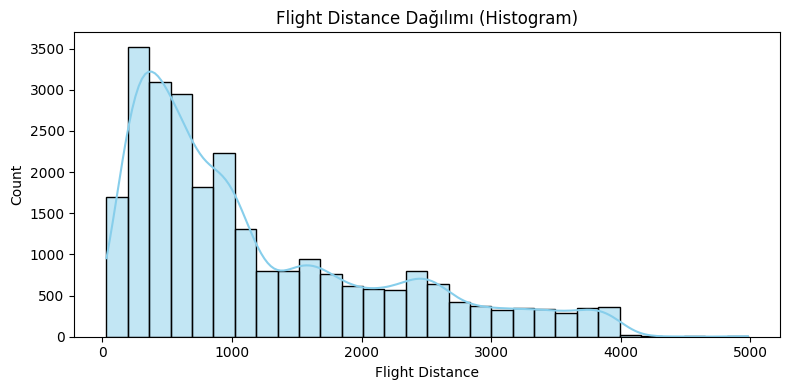

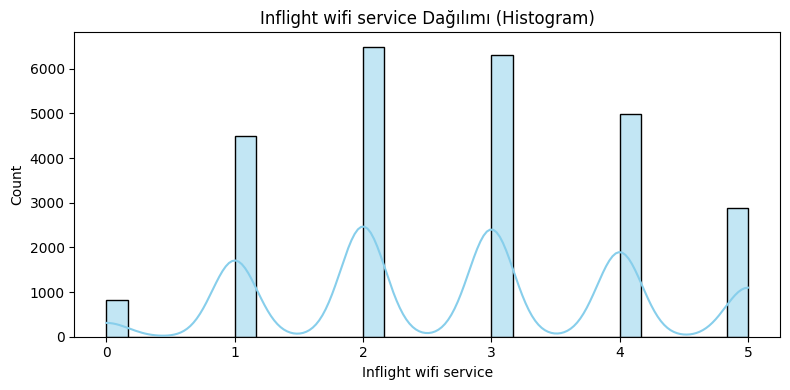

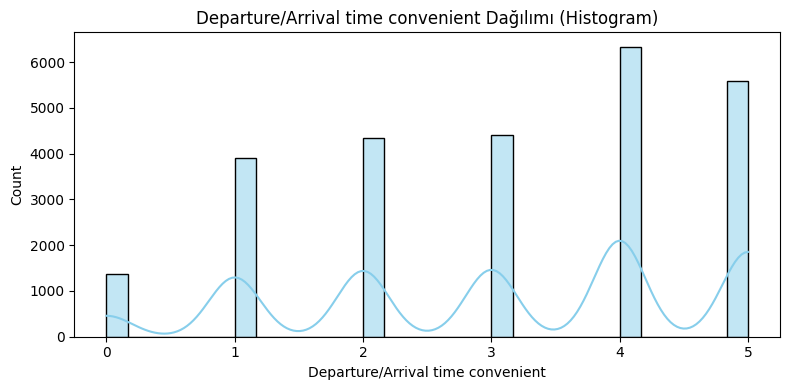

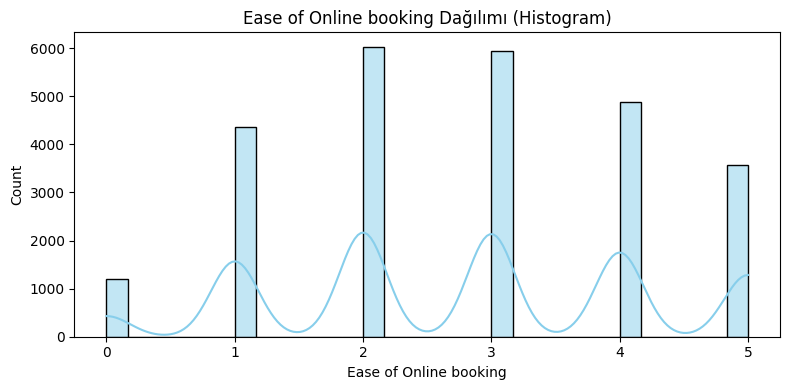

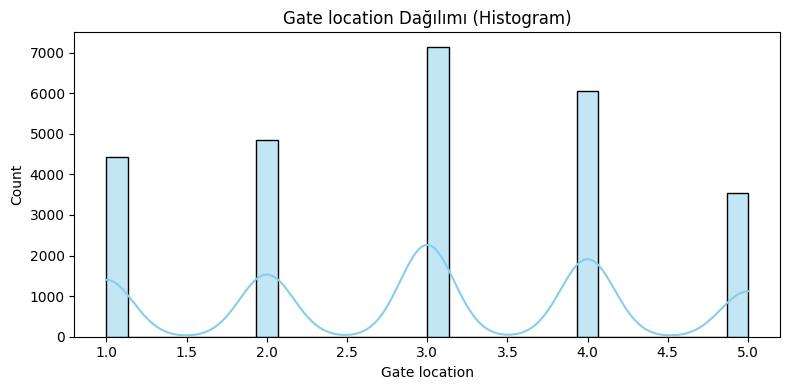

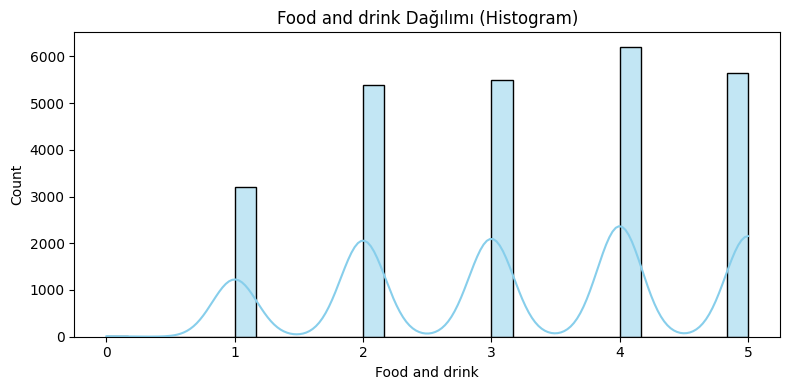

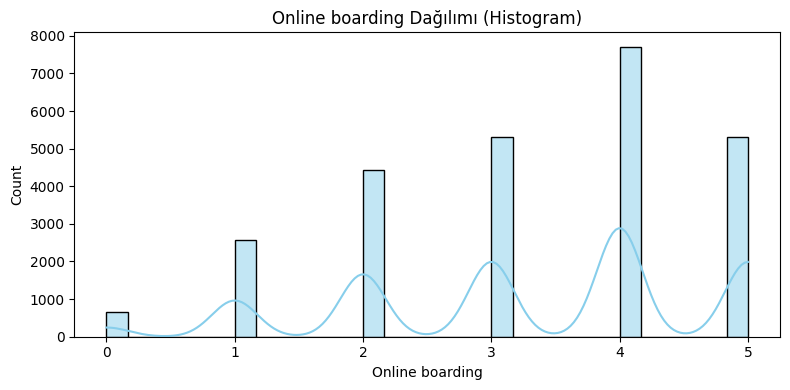

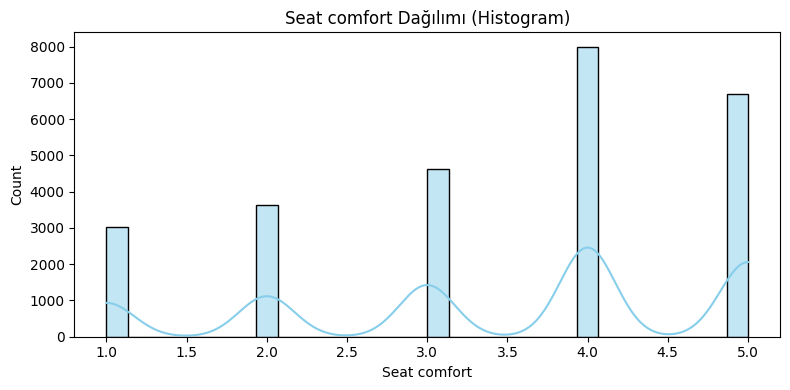

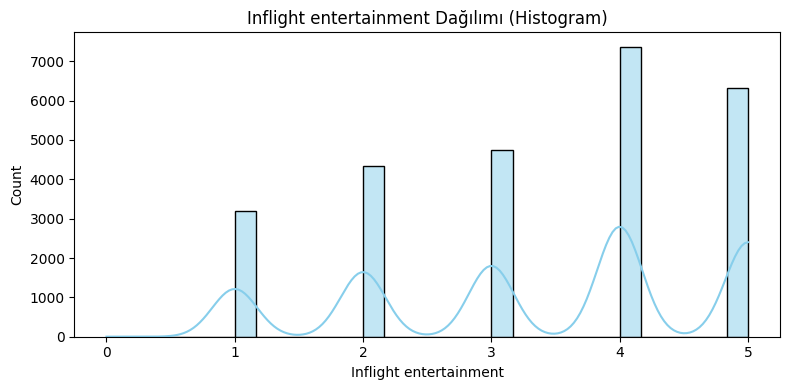

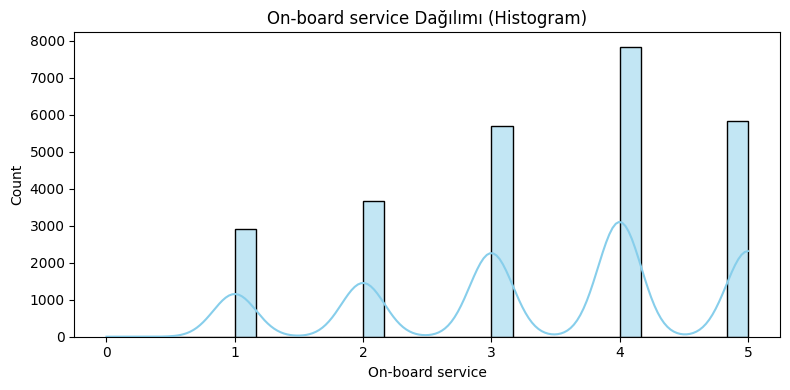

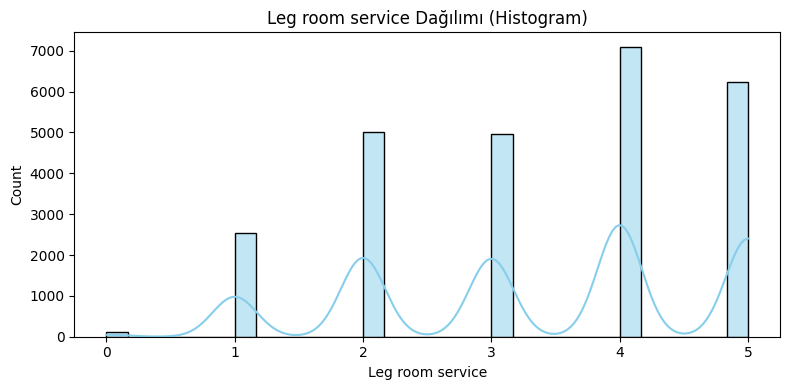

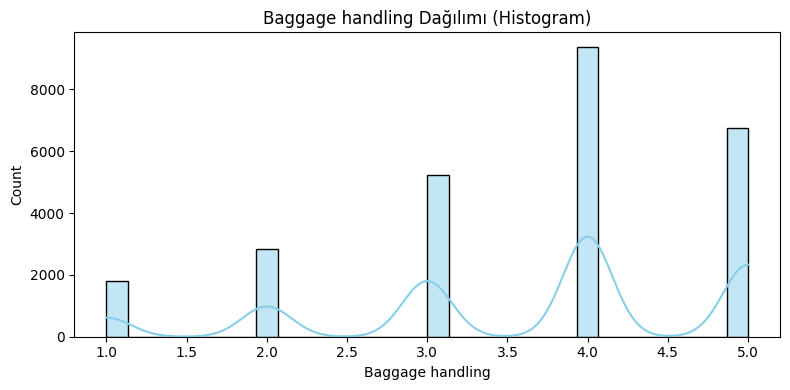

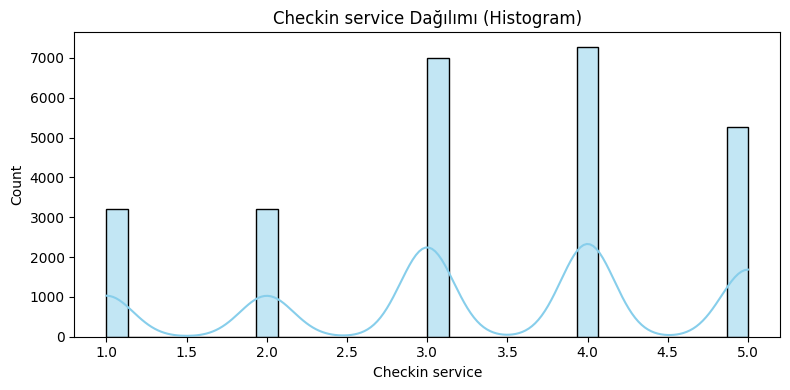

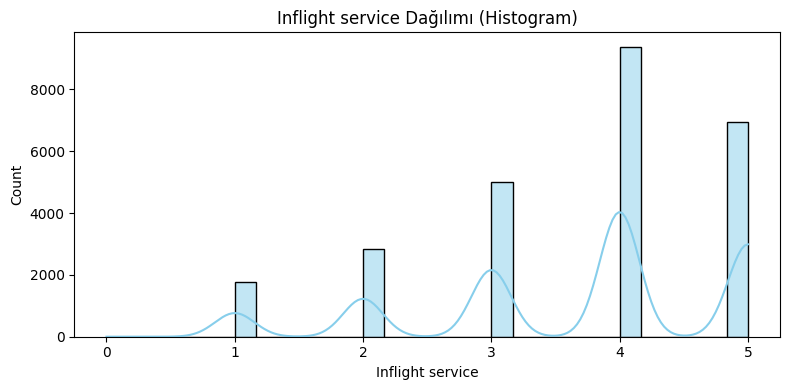

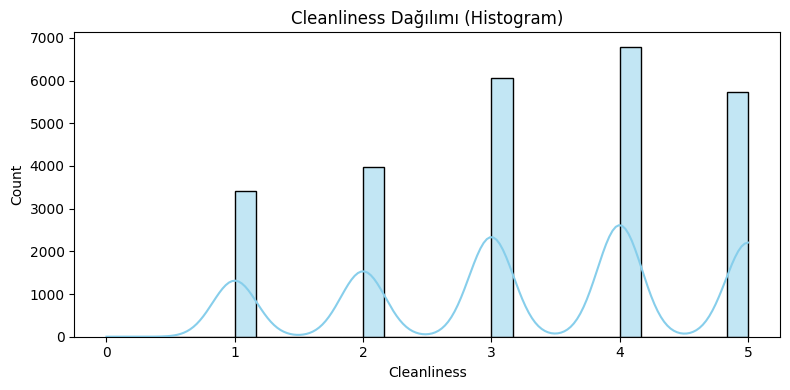

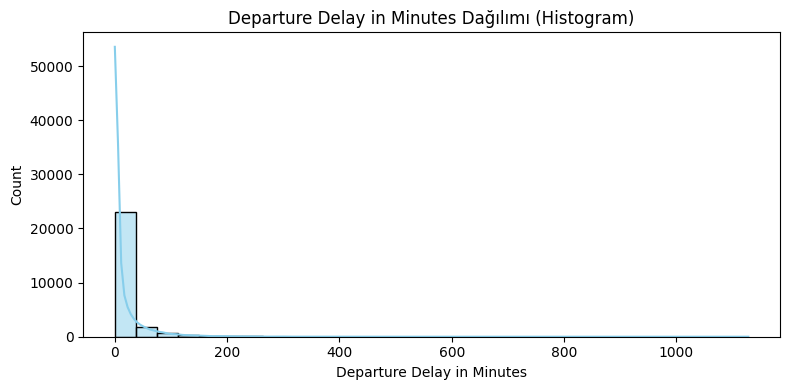

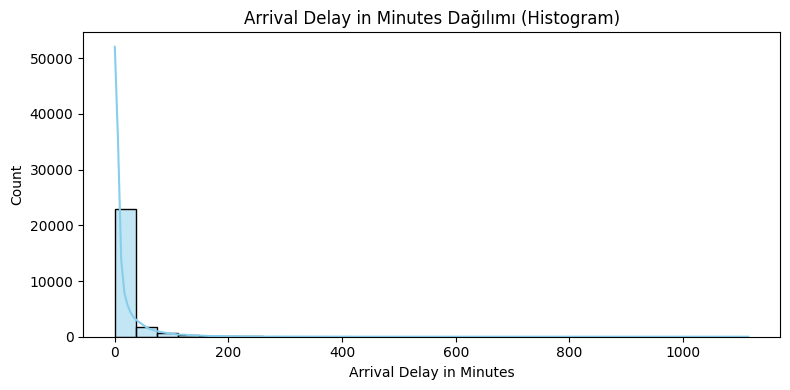

In [19]:
for col in numerical_cols:
    plt.figure(figsize=(8, 4))
    sns.histplot(df[col], bins=30, kde=True, color='skyblue')
    plt.title(f"{col} Dağılımı (Histogram)")
    plt.tight_layout()
    plt.show()


**Sayısal Değişkenlerin Görselleştirilmesi**

Veri setindeki sayısal değişkenler histogram grafiklerle görselleştirilmiştir. Histogramlar sayesinde her bir değişkenin dağılımı ve kullanıcı eğilimleri detaylı şekilde analiz edilmiştir:

**Age**: Dağılım sağa çarpık olup 20–50 yaş aralığında yoğunlaşmıştır. Bu durum, yolcuların büyük çoğunluğunun aktif çalışan nüfus olduğunu göstermektedir.

**Flight Distance**: Grafik sola çarpık bir dağılım göstermektedir. Çoğu yolculuk 0–1000 km arasında gerçekleşirken, uzun mesafeli uçuşlar daha nadirdir.

Inflight wifi service, Gate location, Food and drink gibi 1–5 puan aralıklı servis değerlendirme değişkenleri: Bu değişkenlerde çubuk benzeri görünüm oluşmuştur. Yolcular genellikle uç hizmetleri konusunda uç (1 ya da 5) puan vermeye meyillidir.

**Departure/Arrival Delay in Minutes**: Her iki değişken de pozitif çarpık dağılmıştır. Bu, gecikmelerin büyük çoğunluğunun kısa süreli olduğunu, ancak bazı uçuşlarda ciddi gecikmeler yaşandığını göstermektedir.

/tmp/ipython-input-20-259192840.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x=col, palette="Set2")


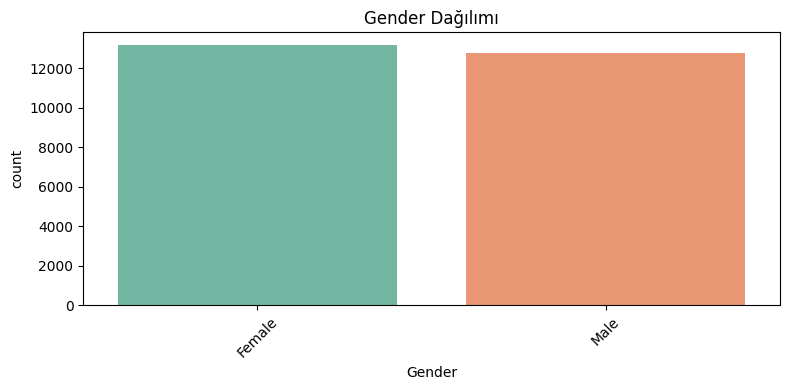

/tmp/ipython-input-20-259192840.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x=col, palette="Set2")


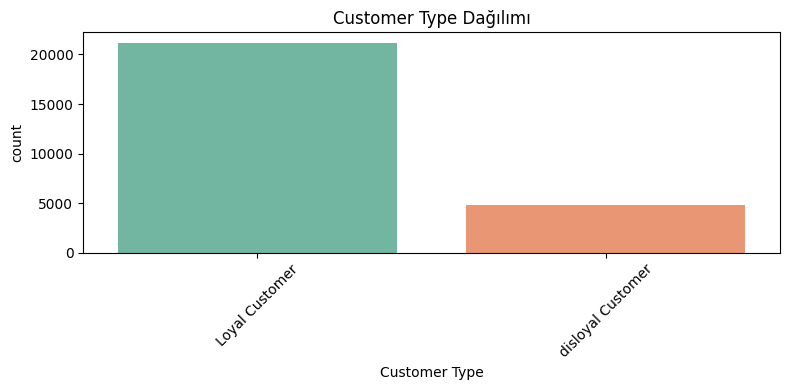

/tmp/ipython-input-20-259192840.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x=col, palette="Set2")


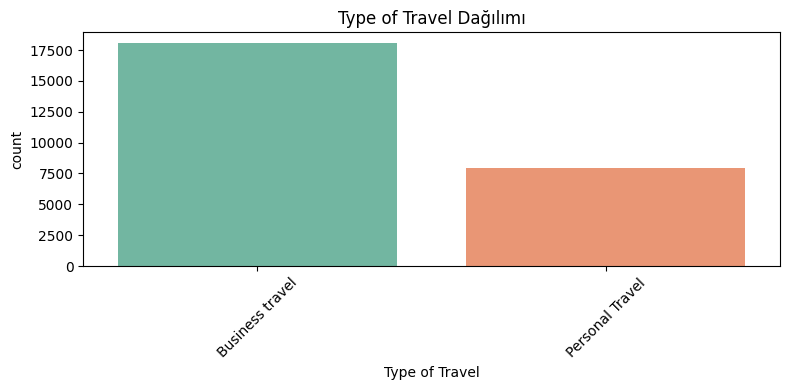

/tmp/ipython-input-20-259192840.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x=col, palette="Set2")


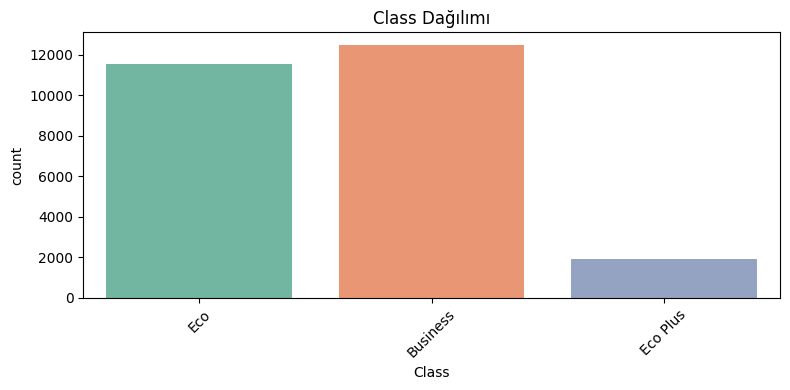

/tmp/ipython-input-20-259192840.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x=col, palette="Set2")


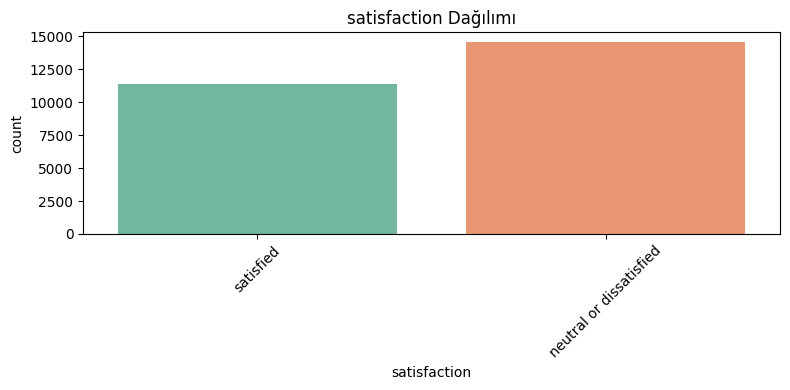

In [20]:
import seaborn as sns
import matplotlib.pyplot as plt

for col in categorical_cols:
    plt.figure(figsize=(8, 4))
    sns.countplot(data=df, x=col, palette="Set2")
    plt.title(f"{col} Dağılımı")
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()


Veri setindeki kategorik değişkenlerin dağılımlarına bakıldığında, yolcuların hizmetlere verdikleri puanların çoğunlukla orta ve yüksek seviyelerde yoğunlaştığı gözlemlenmektedir. Örneğin, “Inflight entertainment” ve “On-board service” değişkenlerinde en yüksek sıklıkla verilen puanlar 4 ve 5’tir. Bu durum, müşterilerin hizmet kalitesinden genel olarak memnun kaldığını göstermektedir. Benzer şekilde, “Checkin service” ve “Cleanliness” değişkenleri de yüksek skor ağırlıklıdır.

Ancak bazı kategorik değişkenlerde (örneğin “Inflight service”), 0 puanının da dikkate değer sayıda gözlemi olduğu görülmektedir. Bu da bazı yolcuların hiç hizmet almadığını ya da memnuniyetsizlik yaşadığını düşündürebilir.

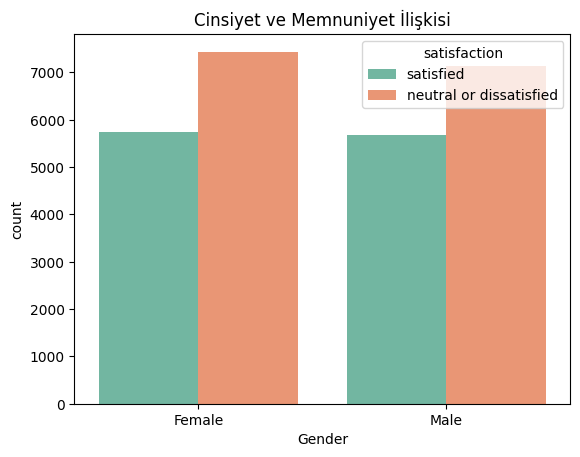

In [22]:
sns.countplot(x='Gender', hue='satisfaction', data=df, palette='Set2')
plt.title("Cinsiyet ve Memnuniyet İlişkisi")
plt.show()


Cinsiyete göre memnuniyet dağılımına baktığımızda, kadın ve erkek yolcular arasında memnuniyet düzeylerinin birbirine oldukça yakın olduğu görülmektedir. Her iki cinsiyette de “neutral or dissatisfied” (nötr veya memnun olmayan) yolcuların sayısı, “satisfied” (memnun) olanlara göre daha fazladır. Ancak bu fark her iki cinsiyet grubunda da benzer oranlarda seyretmektedir.

Cinsiyetin, müşteri memnuniyeti üzerinde belirleyici bir faktör olmadığı gözlemlenmiştir. Kadın ve erkek yolcuların memnuniyet düzeyleri arasında anlamlı bir fark bulunmamaktadır.

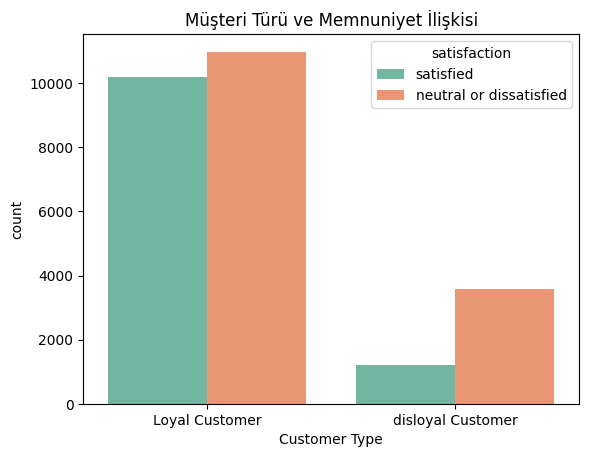

In [23]:
sns.countplot(x='Customer Type', hue='satisfaction', data=df, palette='Set2')
plt.title("Müşteri Türü ve Memnuniyet İlişkisi")
plt.show()


**Müşteri Türü ve Memnuniyet İlişkisi**

Grafikte sadık (loyal) ve sadık olmayan (disloyal) müşterilerin memnuniyet düzeyi karşılaştırılmaktadır. Sadık müşterilerin hem memnun hem de memnun olmayan grupta büyük çoğunluğu oluşturduğu görülmektedir. Ancak memnun müşteri oranı, sadık müşteriler arasında görece daha yüksektir.

Buna karşılık, sadık olmayan müşterilerde memnuniyet oranı oldukça düşüktür. Bu grup içinde memnuniyetsiz birey sayısı memnun olanlara göre çok daha fazladır.


**Müşteri bağlılığı ile memnuniyet arasında olumlu bir ilişki bulunmaktadır. Sadık müşteriler, genel olarak daha memnun görünmektedir. Bu bulgu, müşteri sadakat programlarının memnuniyeti artırma açısından etkili olabileceğini göstermektedir.**

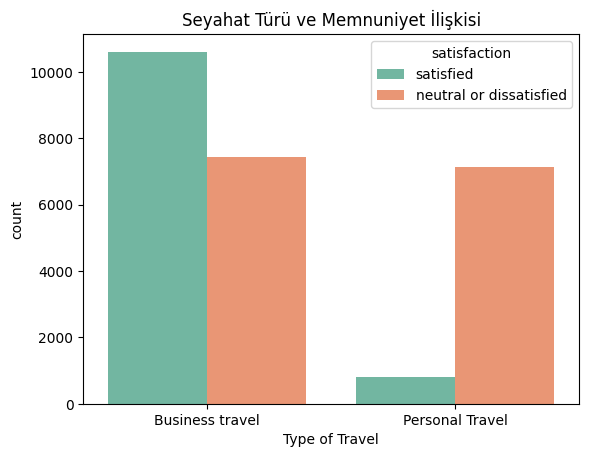

In [24]:
sns.countplot(x='Type of Travel', hue='satisfaction', data=df, palette='Set2')
plt.title("Seyahat Türü ve Memnuniyet İlişkisi")
plt.show()


**Seyahat Türü ve Memnuniyet İlişkisi**

Grafikte iş seyahati (Business travel) ve kişisel seyahat (Personal travel) yapan yolcuların memnuniyet düzeyleri karşılaştırılmaktadır.

İş seyahati yapan yolcular arasında memnun olanların sayısı belirgin şekilde daha fazladır.

Kişisel seyahat eden yolcular arasında ise memnuniyetsizlik oranı çok daha yüksektir. Bu gruptaki memnun yolcu sayısı oldukça düşüktür.


**İş amaçlı seyahat eden bireylerin, kişisel seyahat edenlere göre uçuş deneyiminden daha memnun kaldıkları görülmektedir. Bu durum, iş seyahatlerinde hizmet beklentilerinin karşılanma oranının daha yüksek olabileceğini veya iş seyahatlerinin daha planlı ve ayrıcalıklı yapılmasından kaynaklanabilir.**

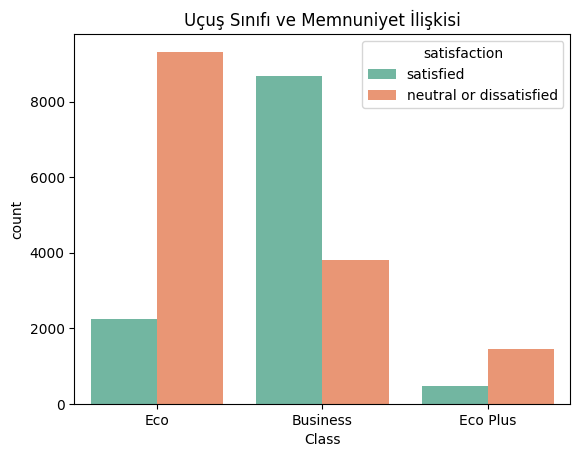

In [25]:
sns.countplot(x='Class', hue='satisfaction', data=df, palette='Set2')
plt.title("Uçuş Sınıfı ve Memnuniyet İlişkisi")
plt.show()


**Uçuş Sınıfı ve Memnuniyet İlişkisi**

Grafikte yolcuların uçuş sınıflarına göre (Eco, Business, Eco Plus) memnuniyet düzeyleri karşılaştırılmıştır.

Economy (Eco) sınıfında seyahat eden yolcuların çoğunluğu memnuniyetsizdir. Bu sınıfta memnun yolcu sayısı görece düşüktür.

Business Class yolcularında ise memnuniyet seviyesi oldukça yüksektir, memnun olan yolcu sayısı memnun olmayanlara göre belirgin şekilde fazladır.

Eco Plus sınıfında yolcu sayısı genel olarak düşük olsa da, memnun olmayanlar memnun olanlardan daha fazladır.


**Yolcuların memnuniyet düzeyleri, uçuş sınıfına göre ciddi farklılık göstermektedir. Özellikle Business Class tercih eden yolcuların hizmet kalitesinden daha fazla memnun kaldığı görülmektedir. Bu durum, konfor, hizmet kalitesi ve ayrıcalıklı olanakların memnuniyet üzerinde önemli bir etkisi olduğunu düşündürmektedir.**



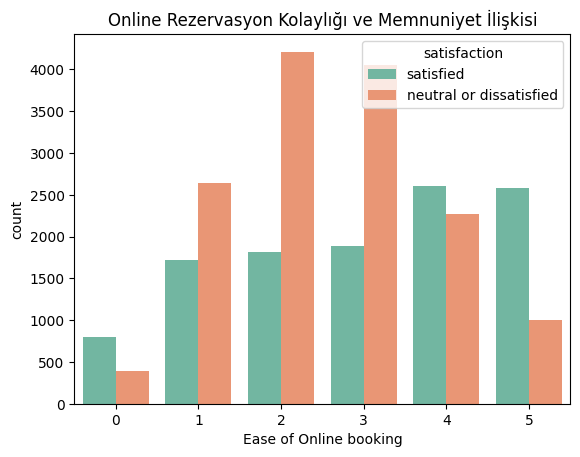

In [26]:
sns.countplot(x='Ease of Online booking', hue='satisfaction', data=df, palette='Set2')
plt.title("Online Rezervasyon Kolaylığı ve Memnuniyet İlişkisi")
plt.show()


**Online Rezervasyon Kolaylığı ve Memnuniyet İlişkisi**

Bu grafikte, yolcuların online rezervasyon sürecini ne kadar kolay buldukları (0–5 arasında derecelendirme) ile memnuniyet düzeyleri arasındaki ilişki incelenmiştir.

0 ve 1 puanı veren yolcuların büyük kısmı memnuniyetsizdir, bu da düşük rezervasyon kolaylığı algısının olumsuz bir deneyimle ilişkili olduğunu göstermektedir.

2 ve 3 puanlarında memnuniyetsiz yolcu sayısı memnunlardan belirgin şekilde fazladır.

4 ve 5 puanı veren yolcular arasında memnuniyet oranı belirgin şekilde yüksektir. Özellikle 5 puan verenlerde memnun olanlar baskın durumdadır.


**Online rezervasyonun kolay bulunması, müşteri memnuniyetini doğrudan etkileyen faktörlerden biridir. Rezervasyon süreci kullanıcı dostu olduğunda, memnuniyet seviyesi artmakta; zorluk yaşandığında ise memnuniyetsizlik oranı yükselmektedir. Bu durum, dijital arayüzlerin kullanıcı deneyimi açısından ne kadar kritik olduğunu ortaya koymaktadır.**



## 📊 Görselleştirme

Bu bölümde, veri setinde yer alan sayısal ve kategorik değişkenler çeşitli grafikler ile görselleştirilmiştir. Sayısal değişkenler için histogram ve boxplot grafik türleri kullanılarak dağılım yapıları ve olası uç değerler incelenmiştir. Kategorik değişkenler için ise bar chart (countplot) türünde grafikler tercih edilmiştir.

Ayrıca, kategorik değişkenlerin her birinin memnuniyet (`satisfaction`) durumuna göre kırılımı da analiz edilerek, farklı yolcu gruplarının hizmetlerden nasıl etkilendiği ortaya konulmuştur.

Görselleştirme sayesinde veri setinde öne çıkan eğilimler, dengesizlikler ve potansiyel etkileyici faktörler açık bir şekilde analiz edilmiştir. Bu adım, sonraki karar süreçlerine ışık tutacak güçlü görsel içgörüler sağlamaktadır.

## ✅ Sonuç ve Genel Değerlendirme

Bu projede, havayolu yolcu memnuniyetini etkileyen faktörlerin anlaşılması amacıyla "Airline Passenger Satisfaction Dataset" veri seti üzerinde kapsamlı bir veri analizi gerçekleştirilmiştir. Analiz süreci boyunca aşağıdaki adımlar sistematik biçimde uygulanmıştır:

- Veri seti yapısı analiz edilmiş, sayısal ve kategorik değişkenler tanımlanmıştır.
- Sayısal değişkenler için merkezi eğilim (ortalama, medyan), dağılım (standart sapma, min, max) ölçümleri yapılmıştır.
- Eksik veriler belirlenmiş, yalnızca `Arrival Delay in Minutes` sütununda çok düşük oranda eksik veri bulunduğu tespit edilmiş ve medyan ile doldurulmuştur.
- Aykırı değerler IQR yöntemi ve boxplot ile analiz edilerek özellikle gecikme süreleri ve bazı hizmet puanlarında anlamlı outlier'lar gözlenmiştir.
- Sayısal değişkenler histogram ve boxplot grafiklerle; kategorik değişkenler ise countplot ile görselleştirilmiş, her grafik yorumlanmıştır.
- Memnuniyet (`satisfaction`) değişkenine göre kırılım analizleri gerçekleştirilmiş; müşteri türü, seyahat amacı ve uçuş sınıfı gibi faktörlerin memnuniyet düzeyini etkilediği gözlemlenmiştir.

Sonuç olarak, veri setinden elde edilen bulgular doğrultusunda:

- **Sadık müşteriler**, yeni müşterilere kıyasla daha yüksek memnuniyet göstermektedir.
- **İş seyahati** yapan yolcular, kişisel seyahat edenlere göre daha yüksek memnuniyet bildirmiştir.
- **Business sınıfı** yolcular, ekonomi sınıfı yolcularına kıyasla hizmetten daha memnun kalmıştır.
- **Online rezervasyon kolaylığı** ve uçuş öncesi/dönemi hizmet puanları memnuniyet üzerinde etkili faktörlerdir.

Bu analizler, havayolu şirketlerinin müşteri segmentasyonu yaparak hedefli iyileştirme stratejileri geliştirmelerine katkı sağlayabilir. Aynı zamanda, veri analitiği ve görselleştirmenin işletme kararlarında ne derece güçlü içgörüler sağlayabileceğini ortaya koymaktadır.
